# **CS224W - Colab 1**

**Bài tập Colab 1**

Khoá học: CS224W: Machine Learning with Graphs | Stanford / Winter 2021

Phiên bản dịch sang tiếng Việt bởi Lê Nhựt Nam, sinh viên Khoa học Máy tính, bộ môn Khoa học Máy tính, khoa Công Nghệ Thông Tin, ĐH Khoa học Tự nhiên 

Copyright CS224W: Machine Learning with Graphs | Stanford / Winter 2021

Solution codes thực hiện bởi Lê Nhựt Nam

Với bài Colab này, chúng ta sẽ viết hoàn chỉnh một pipeline cho **learning node embeddings**. Chúng ta sẽ đi qua 3 bước sau đây.

Để bắt đầu, chúng ta sẽ dùng một đồ thị kinh điển trong khoa học mạng, [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Chúng ta sẽ tìm hiểu thống kê đa đồ thị cho đồ thị này.

Sau đó, chúng ta sẽ làm việc cùng nhau để biến đổi cấu trúc đồ thị thành một tensor PyTorch, để chúng ta có thể thực hiện học máy trên đồ thị.

Cuối cùng, chúng ta sẽ kết thúc thuật toán học đầu tiên trên đồ thị: một node embedding modelt. Để đơn giản, mô hình của chúng ta ở đây đơn giản hơn so với các thuật toán DeepWalk/ node2vec được dạy trong bài giảng. Nhưng nó vẫn bổ ích và đầy thách thức, vì chúng ta sẽ code nó lại từ đầu bằng PyTorch.

Ok, và giờ hãy bắt đầu!


**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1. Cơ bản về đồ thị -  Graph Basics

Để bắt đầu, chúng ta sẽ dùng một đồ thị kinh điển trong khoa học mạng, [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Chúng ta sẽ tìm hiểu thống kê đa đồ thị cho đồ thị này.

## Cài đặt - Setup

Chúng ta sẽ sử dụng nhiều NetworkX trong bài Colab này, thế nên đầu tiên, hãy import nó vào. :)

In [1]:
# Import thư viện NetworkX với tên thay thế là nx
import networkx as nx

## Zachary's karate club network


[Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) là một đồ thị mô tả một mạng xã hội của 34 thành viên trong một câu lạc bộ Karate và những tài liệu liên kết giữa những thành viên nằm bên ngoài câu lạc bộ

In [2]:
# Khởi tạo đồ thị G
G = nx.karate_club_graph()

# G là một đồ thị vô hướng
type(G)

networkx.classes.graph.Graph

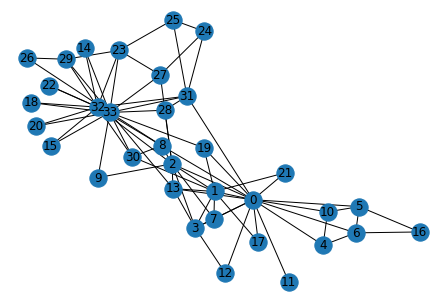

In [3]:
# Trực quan hoá đồ thị
nx.draw(G, with_labels = True)

## Câu hỏi 01: Bậc trung bình của mạng câu lạc bộ Karate là bao nhiêu? (5 điểm)

In [4]:
import math

def average_degree(num_edges, num_nodes):
  """
  Function: average_degree
  Paramters:
    - num_edges: the number of edges
    - num_nodes: the number of nodes
  Returns: the average node degree of the graph
  """
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  # Explain: In any graph, the sum of the degrees of the vertices equals twice the number of edges.
  avg_degree = math.floor(num_edges*2 / num_nodes)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 4


## Câu hỏi 02: Hệ số phân cụm trung bình của mạng lưới câu lạc bộ karate là gì? (5 điểm)

In [5]:
def average_clustering_coefficient(G):
  """
  Function: average_clustering_coefficient
  Paramters:
    - G: the input nx.Graph G - the input karate club network
  Returns: the average clustering coefficient
  """
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = round(nx.average_clustering(G), 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Câu hỏi 03: Giá trị PageRank cho node 0 (node với id là 0) sau một lần duyệt PageRank? (5 điểm)

Hãy hoàn thành đoạn code bên dưới bằng cách cài đặt biểu thức PageRank: $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
  """
  Function: one_iter_pagerank
  Paramters:
    - G: the input nx.Graph G - the input karate club network
    - beta: beta coeficient
    - r0: r0 PageRank value for the input node
    - node_id: the input node ie, in the input nx.Graph G
  Returns: r1 is one interation PageRank value for the input node
  """
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  node_id_lst = [i for j,i in G.edges(node_id)]

  N = G.number_of_nodes()

  r1 = sum(beta * r0 / G.degree(i) + (1-beta)*1.0/N for i in node_id_lst)

  r1 = round(r1, 2)
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.22


## Câu hỏi 04: Hệ số trung tâm lân cận - closeness centrality (raw) cho mạng lưới câu lạc bộ Karate node 5 là gì? (5 điểm)

Biểu thức cho hệ số trung tâm lân cận - closeness centrality như sau: 
$$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$$

In [7]:
def closeness_centrality(G, node=5):
  """
  Function closeness_centrality
  Parameters:
    - G: the input nx.Graph G - the input karate club network
    - node: Default value 5, the node id in the graph
  Returns:  closeness centrality (raw) coeficient
  """
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.
  closeness = (1/G.number_of_nodes()) * nx.algorithms.centrality.closeness_centrality(G, node, 
                                                            wf_improved=False)

  closeness = round(closeness, 2)
  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2. Graph to Tensor

Chúng ta sẽ làm việc cùng nhau để biến đổi cấu trúc đồ thị $G$ thành một tensor PyTorch, để chúng ta có thể thực hiện các thuật toán Học Máy trên đồ thị.

## Cài đặt - Setup

Import và kiểm tra phiên bản PyTorch

In [8]:
# Import PyTorch to Colab
import torch

# Print PyTorch Version
print(torch.__version__)

1.8.1+cu101


## Cơ bản về PyTorch Tensor - PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [9]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.9648, 0.6849, 0.8596, 0.2143],
        [0.7121, 0.1212, 0.4325, 0.3839],
        [0.0597, 0.4602, 0.8161, 0.5385]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Câu 05: Lấy ra danh sách các cạnh của mạng lưới câu lạc bộ Karate và biến đổi nó thành `torch.LongTensor`. Giá trị `torch.sum` của `pos_edge_index` tensor? (10 điểm)

In [11]:
def graph_to_edge_list(G):
  """
  Function graph_to_edge_list
  Parameters:
    - G: The input graph nx.Graph
  Returns: the edge list of input graph nx.Graph
  """
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = G.edges()

  edge_list = list(edge_list)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  """
  Function edge_list_to_tensor
  Parameters:
    - edge_list: The edge_list input
  Return: torch.LongTensor edge_list
  """
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  if type(edge_list) is not list:
    edge_list = list(edge_list)

  edge_index = torch.tensor(edge_list, dtype=torch.long)

  edge_index = torch.transpose(edge_index, 0, 1)
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Câu 06: Cài đặt hàm lấy ra danh sách những negative edge. Sau đó, bạn hãy trả lời những cạnh từ edge_1 đến edge_5 có thể là một negative edge hay trong mạng lưới câu lạc bộ Karate hay không? (10 điểm)

In [12]:
import random

def sample_negative_edges(G, num_neg_samples):
  """
  Function sample_negative_edges
  Parameters:
    - G: The input graph
    - num_neg_samples: The number of sampled negative edges
  """
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loop should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  while len(neg_edge_list) != num_neg_samples:
    node_1 = random.randint(min(G.nodes()), max(G.nodes()))

    node_2 = random.randint(min(G.nodes()), max(G.nodes()))
    
    if node_1 != node_2 and (node_1, node_2) not in neg_edge_list and (node_2, node_1) not in neg_edge_list and (node_1, node_2) not in G.edges():
      neg_edge_list.append((node_1, node_2))
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])


# 3. Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Cài đặt - Setup

In [13]:
# Import Torch and Torch Neural Networks
import torch
import torch.nn as nn

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt

# Using Principal Components Analysis for reduction-dimesion
from sklearn.decomposition import PCA

# Don't forget check PyTorch version again
print(torch.__version__)

1.8.1+cu101


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [14]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [15]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.2707, -2.1999, -0.4587,  0.0687,  0.6740,  1.6271, -1.3381, -1.7234]],
       grad_fn=<EmbeddingBackward>)
tensor([[ 0.2707, -2.1999, -0.4587,  0.0687,  0.6740,  1.6271, -1.3381, -1.7234],
        [ 0.5234, -0.3978,  0.6891,  1.7097, -0.0892, -0.5979,  0.0484,  0.2335]],
       grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [16]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  """
  Function create_node_emb
  Parameters:
    - num_node: Default num_node=34
    - embedding_dim: Default embedding_dim=16
  """
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)

  emb.weight.data = torch.rand(emb.weight.data.shape)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


## Trực quan khởi tạo node embeddings - Visualize the initial node embeddings
Một cách tốt nhất để hiểu một ma trận embedding là trực quan hoá lên một mặt phẳng (không gian) 2 chiều (2D).

Ở đây, chúng ta đã cài đặt một hàm trực quan hoá một embedding cho bạn. 

Đầu tiên, chúng ta dùng PCA (phép phân tích thành phần chính) để giảm chiều của embeddings về không gian 2 chiều. Sau đó, trực quan mỗi một điểm và tô màu nó tương ứng với lớp mà nó thuộc về.

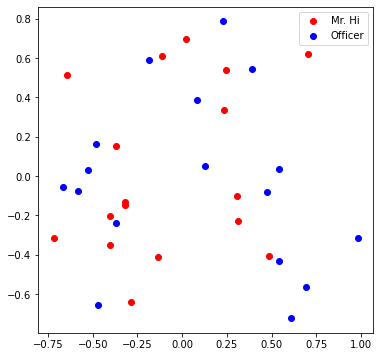

In [17]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Câu 07: Huấn luyện embedding! Hiệu năng tốt nhất mà bạn có thể đạt được là bao nhiều? Hãy báo cáo lại cả mất mát và độ chính xác tốt nhất trong Gradescope. (20 Điểm)

In [18]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  accu = 0.0
  pred_label = (pred >= 0.5) * 1
  accu = sum((label == pred_label) * 1.0) / len(label)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 4000
  learning_rate = 0.01

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for epoch in range(epochs):

    ############# Your code here ############
    ## Forward and compute loss
    # (1) Get the embeddings of the nodes in train_edge
    emb_set_u = emb(train_edge[0])

    emb_set_v = emb(train_edge[1])

    # (2) Dot product the embeddings between each node pair
    dot_prod = torch.sum(emb_set_u * emb_set_v, dim=-1)

    # (3) Feed the dot product result into sigmoid
    sig_res = sigmoid(dot_prod)

    # (4) Feed the sigmoid output into the loss_fn
    loss = loss_fn(sig_res, train_label)

    # (5) Calculate accuracy
    acc = accuracy(sig_res, train_label)

    # (6) Print both loss and accuracy of each epoch 
    if (epoch + 1) % 10 == 0:
        print('Epoch {0}: Loss={1}, acc={2}'.format(epoch+1, loss, acc))

    ## Backward
    loss.backward() 

    ## Update weight
    optimizer.step()

    ## Zero gradient
    optimizer.zero_grad()
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch 10: Loss=1.9429171085357666, acc=0.5
Epoch 20: Loss=1.8344974517822266, acc=0.5
Epoch 30: Loss=1.713645100593567, acc=0.5
Epoch 40: Loss=1.596234679222107, acc=0.5
Epoch 50: Loss=1.4873954057693481, acc=0.5
Epoch 60: Loss=1.388396978378296, acc=0.5
Epoch 70: Loss=1.2991231679916382, acc=0.5
Epoch 80: Loss=1.2189584970474243, acc=0.5
Epoch 90: Loss=1.1471151113510132, acc=0.5
Epoch 100: Loss=1.0827665328979492, acc=0.5
Epoch 110: Loss=1.025105357170105, acc=0.5
Epoch 120: Loss=0.9733740091323853, acc=0.5064102411270142
Epoch 130: Loss=0.9268783330917358, acc=0.5128205418586731
Epoch 140: Loss=0.8849937319755554, acc=0.5128205418586731
Epoch 150: Loss=0.8471651077270508, acc=0.5128205418586731
Epoch 160: Loss=0.8129040598869324, acc=0.5256410241127014
Epoch 170: Loss=0.7817827463150024, acc=0.5448718070983887
Epoch 180: Loss=0.7534283995628357, acc=0.557692289352417
Epoch 190: Loss=0.727516770362854, acc=0.5769230723381042
Epoch 200: Loss=0.7037659287452698, acc=0.5833333134651184


## Trực quan hoá node embeddings cuối cùng - Visualize the final node embeddings
Trực quan kết quả node embeddings cuối cùng của bạn ở đây!
Bạn có thể so sánh hình ảnh trực quan này với hình ảnh node embeddings đó.
Sau khi huấn luyện, bạn nên lưu ý rằng hai lớp này được tách biệt rõ ràng hơn.
Đây cũng là một kiểm tra tuyệt vời cho việc cài đặt của bạn.

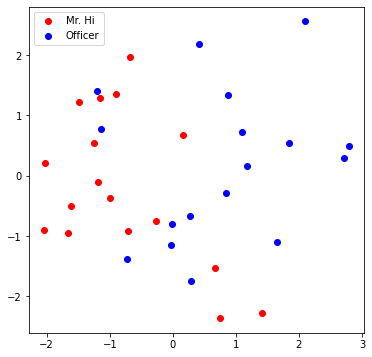

In [19]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.